##  Exploratory Data Analysis (EDA)
In this section, we explore the structure, quality, and relationships within the dataset to identify trends, outliers, and correlations related to college completion rates


## Step 1: Loading in our Dataset
We begin by importing the necessary libraries and loading the College Scorecard dataset.


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("raw_dataset.csv", low_memory=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Columns: 3305 entries, UNITID to MD_EARN_WNE_MALE1_P11
dtypes: float64(918), int64(15), object(2372)
memory usage: 163.5+ MB


<Axes: >

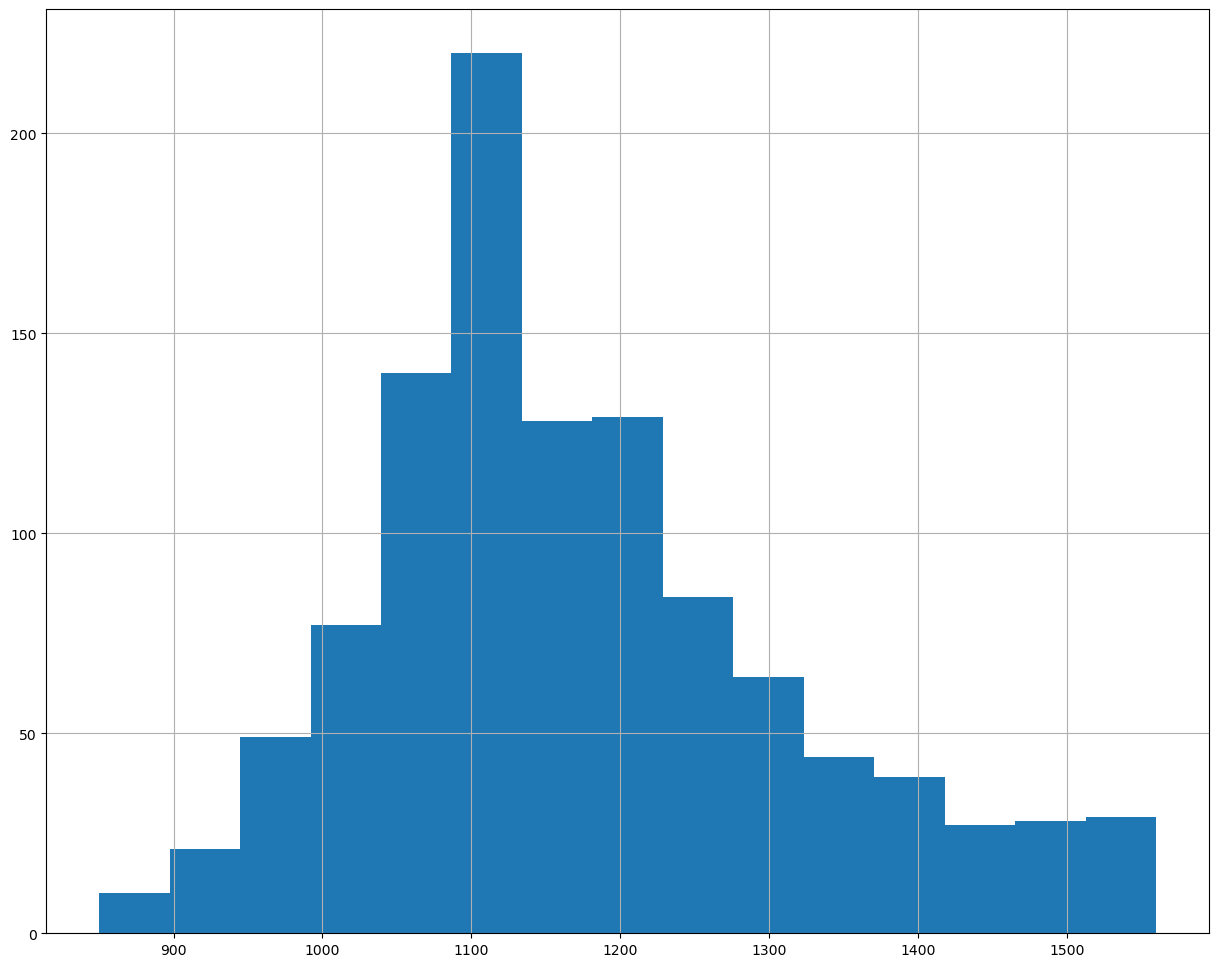

In [36]:
df.head()
df.info()
df.describe()

df['SAT_AVG'].hist(figsize=(15, 12), bins=15)

## Step 2: Exploring the Dataset Structure
We print out the shape of the dataset (number of institutions and features) and take an initial look at all available column names.


### Missing Data Heatmap

KeyboardInterrupt: 

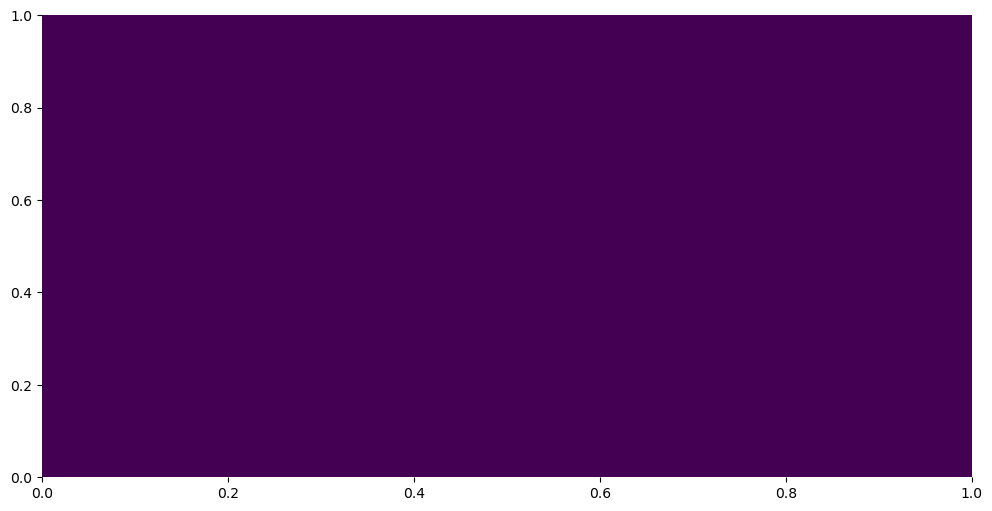

In [37]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [ ]:
#Step 2: Exploring the dataset structure we have
print("Shape:(Institutions and Features) ", df.shape)

#familiarizing ourselves with the column names
print("\nColumn feature names:")
#df.columns.to_list()
print("\n".join(df.columns))

Shape:(Institutions and Features)  (6484, 3305)

Column feature names:
UNITID
OPEID
OPEID6
INSTNM
CITY
STABBR
ZIP
ACCREDAGENCY
INSTURL
NPCURL
SCH_DEG
HCM2
MAIN
NUMBRANCH
PREDDEG
HIGHDEG
CONTROL
ST_FIPS
REGION
LOCALE
LOCALE2
LATITUDE
LONGITUDE
CCBASIC
CCUGPROF
CCSIZSET
HBCU
PBI
ANNHI
TRIBAL
AANAPII
HSI
NANTI
MENONLY
WOMENONLY
RELAFFIL
ADM_RATE
ADM_RATE_ALL
SATVR25
SATVR75
SATMT25
SATMT75
SATWR25
SATWR75
SATVRMID
SATMTMID
SATWRMID
ACTCM25
ACTCM75
ACTEN25
ACTEN75
ACTMT25
ACTMT75
ACTWR25
ACTWR75
ACTCMMID
ACTENMID
ACTMTMID
ACTWRMID
SAT_AVG
SAT_AVG_ALL
PCIP01
PCIP03
PCIP04
PCIP05
PCIP09
PCIP10
PCIP11
PCIP12
PCIP13
PCIP14
PCIP15
PCIP16
PCIP19
PCIP22
PCIP23
PCIP24
PCIP25
PCIP26
PCIP27
PCIP29
PCIP30
PCIP31
PCIP38
PCIP39
PCIP40
PCIP41
PCIP42
PCIP43
PCIP44
PCIP45
PCIP46
PCIP47
PCIP48
PCIP49
PCIP50
PCIP51
PCIP52
PCIP54
CIP01CERT1
CIP01CERT2
CIP01ASSOC
CIP01CERT4
CIP01BACHL
CIP03CERT1
CIP03CERT2
CIP03ASSOC
CIP03CERT4
CIP03BACHL
CIP04CERT1
CIP04CERT2
CIP04ASSOC
CIP04CERT4
CIP04BACHL
CIP05CERT1
CIP05

## Step 3: Selecting Relevant Features for the Study
To focus our analysis, we manually select a subset of columns from the dataset that are most relevant to our research on college admissions, demographics, finances, and outcomes.


In [ ]:
# Manually defined list of columns relevant to your project
relevant_columns = [
    # Institution info
    "UNITID", "INSTNM", "CITY", "STABBR", "CONTROL", "LOCALE",

    # Admissions & test scores
    "ADM_RATE_ALL","ADMCON7","SAT_AVG", "ACTCMMID",

    #Open admission flag
    "OPENADMP",

    # Student body and diversity
    "UGDS", "UGDS_WHITE", "UGDS_BLACK", "UGDS_HISP", "UGDS_ASIAN", "UGDS_AIAN","UGDS_NHPI","UGDS_2MOR", "UGDS_NRA","UGDS_UNKN",
    "UGDS_MEN", "UGDS_WOMEN", "UG25ABV",

     # First-generation info
    "FIRSTGEN_DEBT_MDN", "NOTFIRSTGEN_DEBT_MDN", "PAR_ED_PCT_1STGEN",

    #Students receiving federal loans and then those receiving pell grants
    "PCTFLOAN", "PCTPELL",

    #RAW DATA SUBMITTED BY THE SCHOOLS: Students receiving federal loans and then those receiving pell grants
    "PCTFLOAN_DCS","PCTPELL_DCS",

    #Family Income and Contributions
    "FAMINC","MD_FAMINC",

    #Financial and aid-related
    "TUITIONFEE_IN", "TUITIONFEE_OUT", "COSTT4_A", "AVGFACSAL", 'DEBT_MDN', "GRAD_DEBT_MDN",

    # Outcome metrics
    "RET_FT4", "C150_4", "COMPL_RPY_3YR_RT",
    "MD_EARN_WNE_INC1_P10", "MD_EARN_WNE_INC2_P10", "MD_EARN_WNE_INC3_P10"
]

#we can then filter and display the columns that seem most relevant to this study
df_relevant = df[relevant_columns]

df_relevant.head()


,UNITID,INSTNM,CITY,STABBR,CONTROL,LOCALE,ADM_RATE_ALL,ADMCON7,SAT_AVG,ACTCMMID,...,COSTT4_A,AVGFACSAL,DEBT_MDN,GRAD_DEBT_MDN,RET_FT4,C150_4,COMPL_RPY_3YR_RT,MD_EARN_WNE_INC1_P10,MD_EARN_WNE_INC2_P10,MD_EARN_WNE_INC3_P10
0,100654,Alabama A & M University,Normal,AL,1,12.0,0.683956,5.0,920.0,18.0,...,23167.0,8651.0,16600,31000,0.5928,0.2678,0.429326288,37848.0,42544.0,48095.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,1,12.0,0.866794,5.0,1291.0,27.0,...,26257.0,11837.0,15832,22300,0.8243,0.6442,0.6182700794,49475.0,57029.0,58346.0
2,100690,Amridge University,Montgomery,AL,2,12.0,NaN,NaN,NaN,NaN,...,NaN,4134.0,13385,32189,NaN,0.5000,0.4390243902,NaN,NaN,NaN
3,100706,University of Alabama in Huntsville,Huntsville,AL,1,12.0,0.781043,5.0,1259.0,28.0,...,25777.0,10267.0,13905,20705,0.8018,0.6295,0.680887372,55158.0,66922.0,67638.0
4,100724,Alabama State University,Montgomery,AL,1,12.0,0.965978,5.0,963.0,18.0,...,21900.0,8071.0,17500,31000,0.5960,0.2773,0.3660377358,32315.0,39268.0,41081.0


## Step 4: Assessing Missing Data
We check each selected feature to see how many missing values it contains and what percentage of the total dataset that represents. This helps us decide how to handle these missing entries.


In [ ]:
missing = df_relevant.isnull().sum()
missing_percent = (missing / len(df_relevant)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing,
    '% of Total': missing_percent
}).sort_values(by='% of Total', ascending=False)

missing_df = missing_df[missing_df['Missing Values'] > 0]  # Only show ones with missing
missing_df


,Missing Values,% of Total
ACTCMMID,5500,84.824183
SAT_AVG,5395,83.204812
ADMCON7,4498,69.370759
RET_FT4,4390,67.705120
ADM_RATE_ALL,4269,65.838988
C150_4,4204,64.836521
COSTT4_A,3168,48.858729
MD_EARN_WNE_INC3_P10,2715,41.872301
MD_EARN_WNE_INC2_P10,2715,41.872301
MD_EARN_WNE_INC1_P10,2715,41.872301


### Step 4b: Impute Missing Values
In this step, we handle missing values for specific columns by filling them with the median value within each institution type (`CONTROL`). This ensures that missing values are replaced with appropriate data based on the institution's characteristics (Public, Private nonprofit, Private for-profit). Additionally, we create flags to indicate whether each value was originally missing, which could be useful for modeling later on.



In [ ]:
# Columns to impute
impute_columns = [
    'ACTCMMID', 'SAT_AVG', 'ADMCON7', 'RET_FT4',
    'ADM_RATE_ALL', 'C150_4', 'TUITIONFEE_IN', 'TUITIONFEE_OUT',
    'COSTT4_A', 'MD_EARN_WNE_INC1_P10',
    'MD_EARN_WNE_INC2_P10', 'MD_EARN_WNE_INC3_P10', 'AVGFACSAL'
]

# Group by 'CONTROL' (1 = Public, 2 = Private nonprofit, 3 = Private for-profit)
group_col = 'CONTROL'

# Fill missing values with group median
for col in impute_columns:
    df_relevant[col] = df_relevant.groupby(group_col)[col].transform(lambda x: x.fillna(x.median()))

#if all 0's are returned, then the imputation has successfully worked on the dataset
df_relevant[impute_columns].isna().sum()


/var/folders/dn/6ddty5pj0t383r9xmwfs26s40000gn/T/ipykernel_63508/2736821922.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant[col] = df_relevant.groupby(group_col)[col].transform(lambda x: x.fillna(x.median()))


ACTCMMID                0
SAT_AVG                 0
ADM_RATE_ALL            0
COSTT4_A                0
C150_4                  0
TUITIONFEE_IN           0
TUITIONFEE_OUT          0
AVGFACSAL               0
MD_EARN_WNE_INC1_P10    0
MD_EARN_WNE_INC2_P10    0
MD_EARN_WNE_INC3_P10    0
dtype: int64

## Step 5: Visualizing Key Variables

In this section, we create visualizations to better understand the distribution and relationships of key features in our dataset. This helps us identify patterns, outliers, and associations that may influence college outcomes like graduation rates.


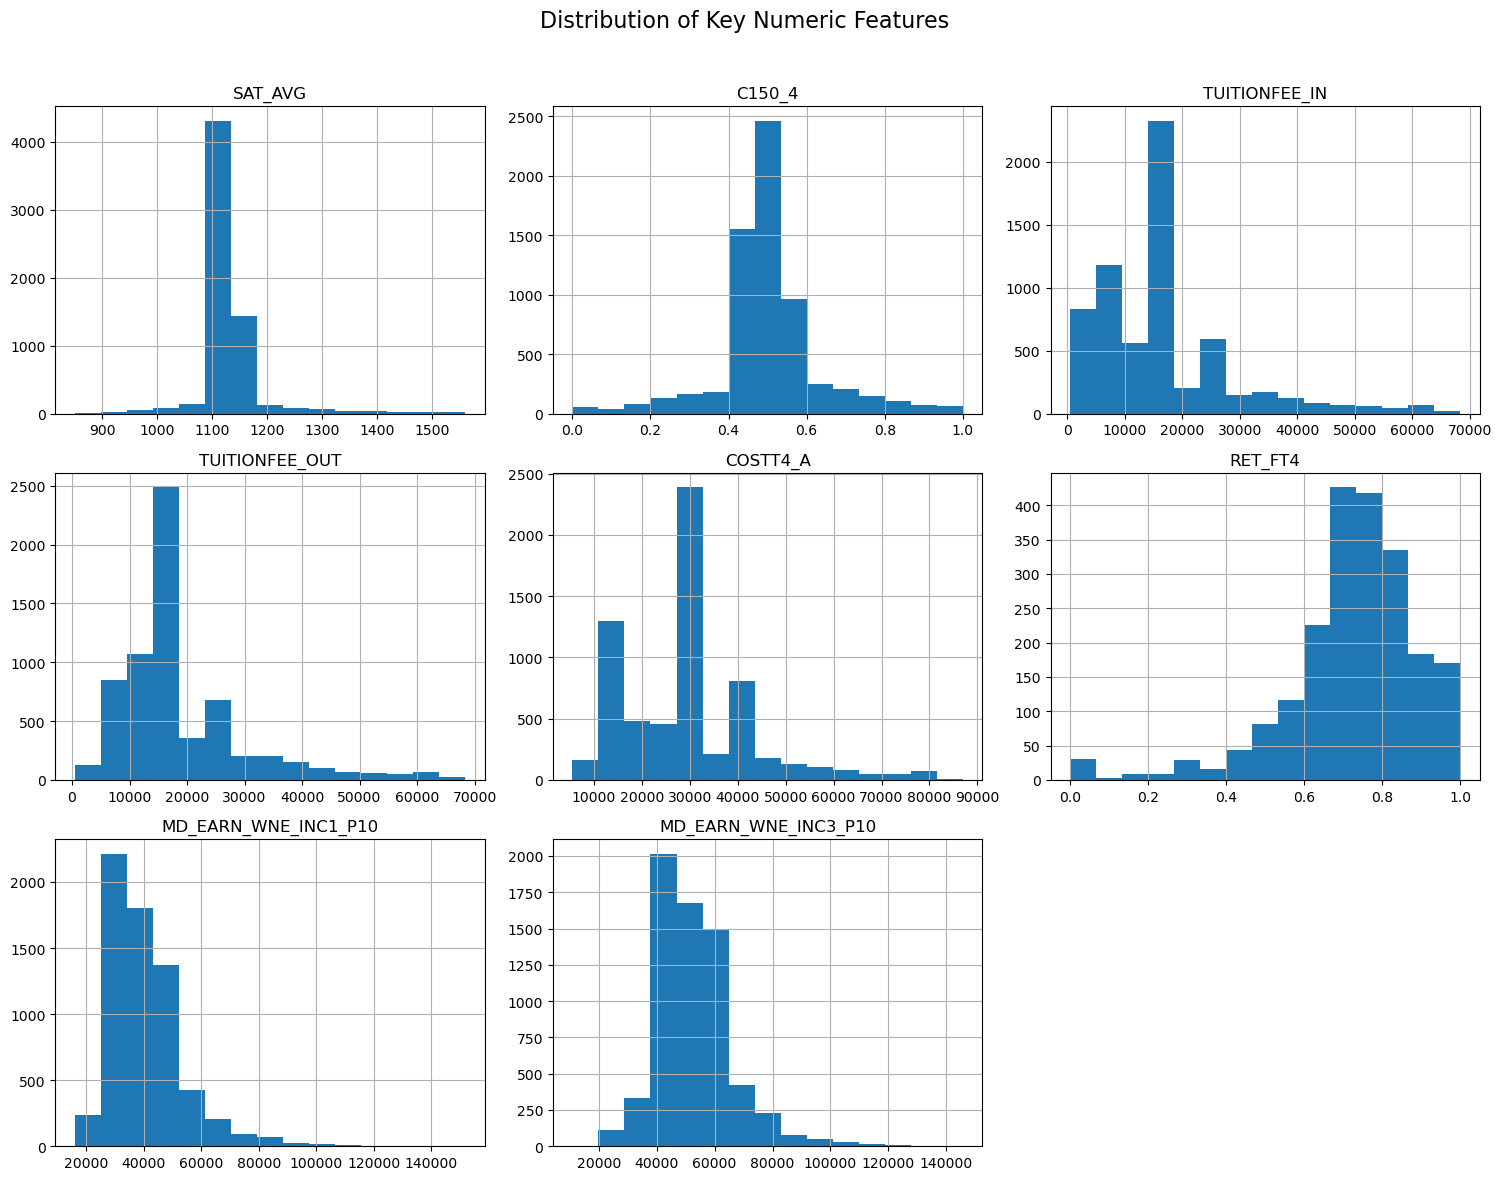

In [ ]:
# Histograms for numerical features
numeric_cols = ['SAT_AVG', 'C150_4', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'COSTT4_A',
                'RET_FT4', 'MD_EARN_WNE_INC1_P10', 'MD_EARN_WNE_INC3_P10']

df_relevant[numeric_cols].hist(figsize=(15, 12), bins=15)
plt.suptitle("Distribution of Key Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


/var/folders/dn/6ddty5pj0t383r9xmwfs26s40000gn/T/ipykernel_63508/2557622404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['CONTROL_LABEL'] = df_relevant['CONTROL'].map(control_map)


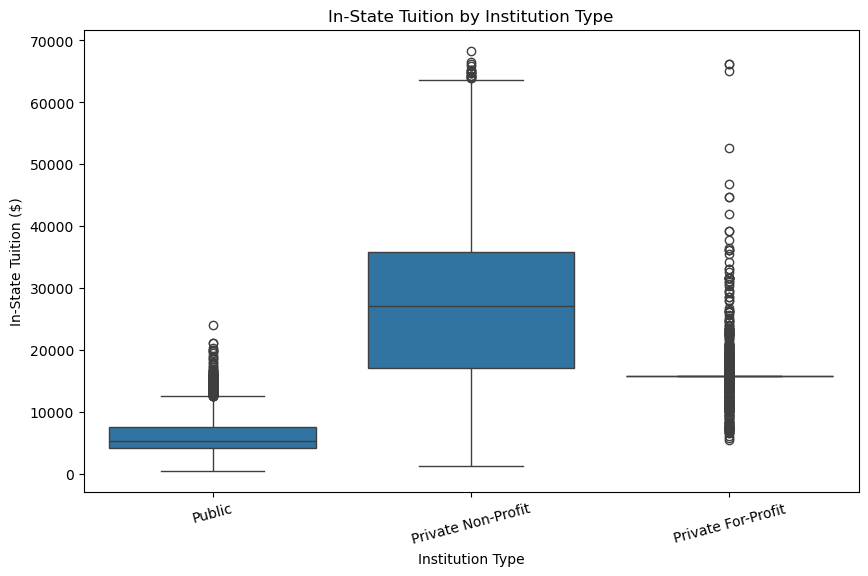

In [ ]:
#Box Plots by Public vs Private Schools
# Convert 'CONTROL' to readable labels
control_map = {1: 'Public', 2: 'Private Non-Profit', 3: 'Private For-Profit'}
df_relevant['CONTROL_LABEL'] = df_relevant['CONTROL'].map(control_map)

# Box plot for tuition by control type
plt.figure(figsize=(10, 6))
sns.boxplot(x='CONTROL_LABEL', y='TUITIONFEE_IN', data=df_relevant)
plt.title("In-State Tuition by Institution Type")
plt.ylabel("In-State Tuition ($)")
plt.xlabel("Institution Type")
plt.xticks(rotation=15)
plt.show()


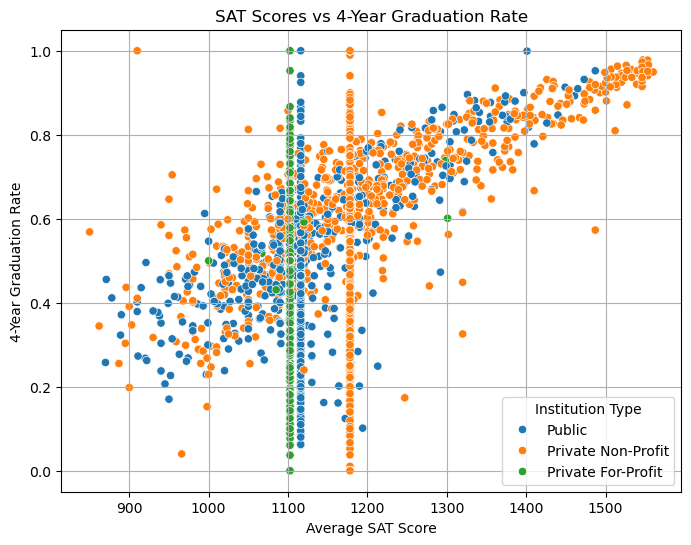

In [ ]:
#Scatter Plot: SAT vs Graduation Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_relevant, x='SAT_AVG', y='C150_4', hue='CONTROL_LABEL')
plt.title("SAT Scores vs 4-Year Graduation Rate")
plt.xlabel("Average SAT Score")
plt.ylabel("4-Year Graduation Rate")
plt.legend(title="Institution Type")
plt.grid(True)
plt.show()


/var/folders/dn/6ddty5pj0t383r9xmwfs26s40000gn/T/ipykernel_63508/1367188231.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['LOCALE_GROUP'] = df_relevant['LOCALE'].map(locale_map)


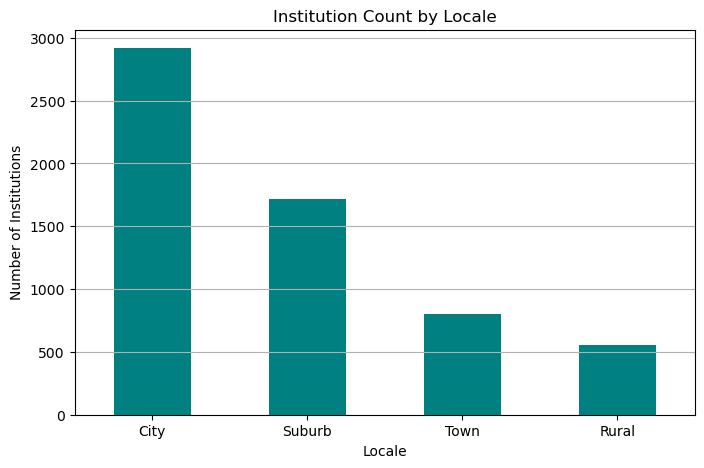

In [ ]:
#Bar Chart of Locale Distribution
# Convert LOCALE codes to general descriptions (simplified)
locale_map = {
    11: 'City', 12: 'City', 13: 'City',
    21: 'Suburb', 22: 'Suburb', 23: 'Suburb',
    31: 'Town', 32: 'Town', 33: 'Town',
    41: 'Rural', 42: 'Rural', 43: 'Rural'
}
df_relevant['LOCALE_GROUP'] = df_relevant['LOCALE'].map(locale_map)

# Bar chart of institution count by locale
plt.figure(figsize=(8, 5))
df_relevant['LOCALE_GROUP'].value_counts().plot(kind='bar', color='teal')
plt.title("Institution Count by Locale")
plt.xlabel("Locale")
plt.ylabel("Number of Institutions")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


### Step 6: Display Group-wise Medians Used for Imputation
To better understand the imputation process, we calculate and display the median values for each numeric column within each `CONTROL` group (Public, Private nonprofit, Private for-profit). These are the values used to fill in missing data, ensuring that imputation is context-aware.


In [ ]:
# Only include numeric columns that have been imputed
imputed_cols = [
    "ACTCMMID", "SAT_AVG", "ADMCON7", "RET_FT4", "ADM_RATE_ALL", "C150_4",
    "COSTT4_A", "MD_EARN_WNE_INC1_P10", "MD_EARN_WNE_INC2_P10", "MD_EARN_WNE_INC3_P10",
    "TUITIONFEE_OUT", "TUITIONFEE_IN", "AVGFACSAL"
]

# Group by 'CONTROL' and calculate medians
control_medians = df_relevant.groupby("CONTROL")[imputed_cols].median()

# Display the result nicely
pd.set_option("display.float_format", "{:.2f}".format)
display(control_medians)


,ACTCMMID,SAT_AVG,ADMCON7,RET_FT4,ADM_RATE_ALL,C150_4,COSTT4_A,MD_EARN_WNE_INC1_P10,MD_EARN_WNE_INC2_P10,MD_EARN_WNE_INC3_P10,TUITIONFEE_OUT,TUITIONFEE_IN,AVGFACSAL
CONTROL,,,,,,,,,,,,,
1,23.00,1116.00,5.00,0.73,0.81,0.46,15678.50,40364.50,48504.00,52994.00,10646.50,5186.00,7867.00
2,24.00,1178.00,5.00,0.76,0.74,0.57,42865.50,47863.00,54443.00,60563.00,27208.00,27140.00,7122.00
3,26.00,1102.50,3.00,0.66,0.80,0.50,29875.50,31433.00,39103.00,41897.00,15856.00,15834.50,5566.50


## Correlation Heatmap

To better understand relationships between numerical variables, we use a correlation heatmap. This allows us to see which features are positively or negatively associated with each other, especially in relation to outcomes like 4-year graduation rate (`C150_4`) and retention rate (`RET_FT4`).


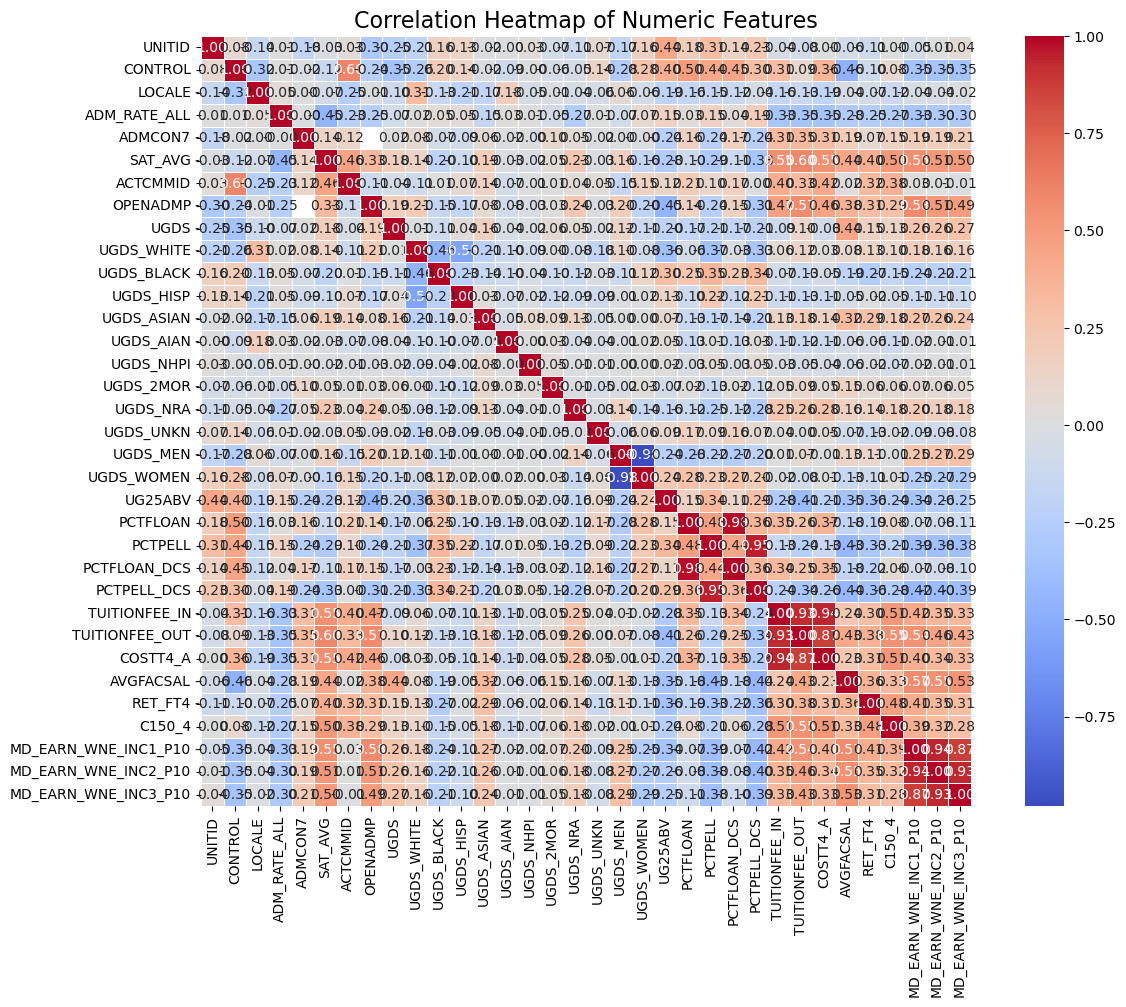

In [ ]:
# Compute correlation matrix for numeric features
corr_matrix = df_relevant.select_dtypes(include=['float64', 'int64']).corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()


### Correlation Insights

- `SAT_AVG` is strongly correlated with `C150_4` and `RET_FT4`, suggesting test scores may predict academic success.
- Socioeconomic factors like `PCTPELL` show negative correlation with graduation and retention rates.


### Step 7: Exploring Correlation with the Target Variable (`C150_4`)
We calculate the correlation matrix for all numeric features and isolate the correlation values with our target variable, `C150_4` (completion rate within 4 years). This helps identify which features are most strongly associated with our outcome of interest.


In [ ]:
# Select only numeric columns
df_numeric = df_relevant.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric columns
corr_matrix = df_numeric.corr()

# View correlation with the target variable (C150_4)
target_corr = corr_matrix["C150_4"]

# Display the correlations with the target, sorted in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

target_corr_sorted


C150_4                  1.00
TUITIONFEE_OUT          0.55
COSTT4_A                0.51
TUITIONFEE_IN           0.51
SAT_AVG                 0.50
RET_FT4                 0.48
MD_EARN_WNE_INC1_P10    0.39
ACTCMMID                0.38
AVGFACSAL               0.33
MD_EARN_WNE_INC2_P10    0.32
OPENADMP                0.29
MD_EARN_WNE_INC3_P10    0.28
UGDS_ASIAN              0.18
UGDS_NRA                0.18
ADMCON7                 0.15
UGDS                    0.13
UGDS_WHITE              0.10
CONTROL                 0.08
PCTFLOAN                0.08
PCTFLOAN_DCS            0.06
UGDS_2MOR               0.06
UGDS_WOMEN              0.01
UNITID                  0.00
UGDS_MEN               -0.01
UGDS_UNKN              -0.02
UGDS_HISP              -0.05
UGDS_NHPI              -0.07
UGDS_AIAN              -0.11
LOCALE                 -0.12
UGDS_BLACK             -0.15
PCTPELL                -0.21
UG25ABV                -0.24
ADM_RATE_ALL           -0.27
PCTPELL_DCS            -0.28
Name: C150_4, 

In [ ]:
strong_corr_features = target_corr_sorted[abs(target_corr_sorted) > 0.3]
strong_corr_features

C150_4                 1.00
TUITIONFEE_OUT         0.55
COSTT4_A               0.51
TUITIONFEE_IN          0.51
SAT_AVG                0.50
RET_FT4                0.48
MD_EARN_WNE_INC1_P10   0.39
ACTCMMID               0.38
AVGFACSAL              0.33
MD_EARN_WNE_INC2_P10   0.32
Name: C150_4, dtype: float64

### Step 7.1 – Visualizing Feature Relationships with C150_4


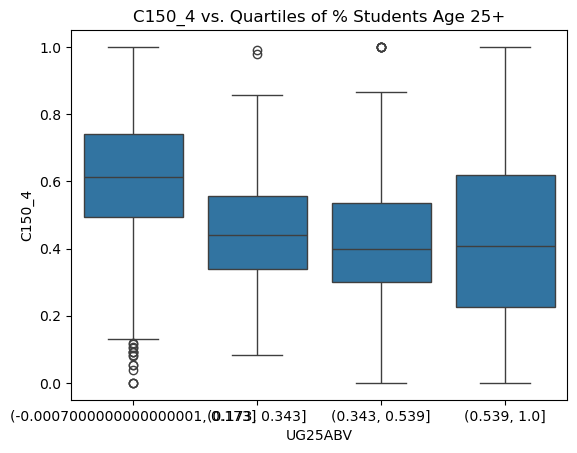

In [ ]:
sns.boxplot(x=pd.qcut(df['UG25ABV'], 4), y=df['C150_4'])
plt.title("C150_4 vs. Quartiles of % Students Age 25+")
plt.show()

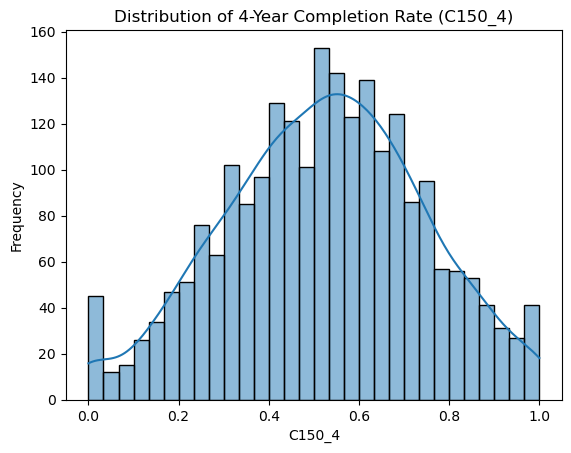

In [ ]:
sns.histplot(df['C150_4'], bins=30, kde=True)
plt.title("Distribution of 4-Year Completion Rate (C150_4)")
plt.xlabel("C150_4")
plt.ylabel("Frequency")
plt.show()


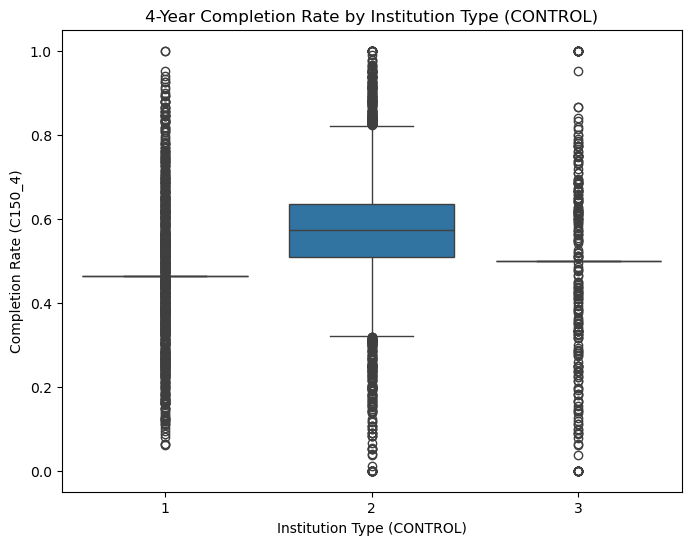

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='CONTROL', y='C150_4', data=df_relevant)
plt.title("4-Year Completion Rate by Institution Type (CONTROL)")
plt.xlabel("Institution Type (CONTROL)")
plt.ylabel("Completion Rate (C150_4)")
plt.show()


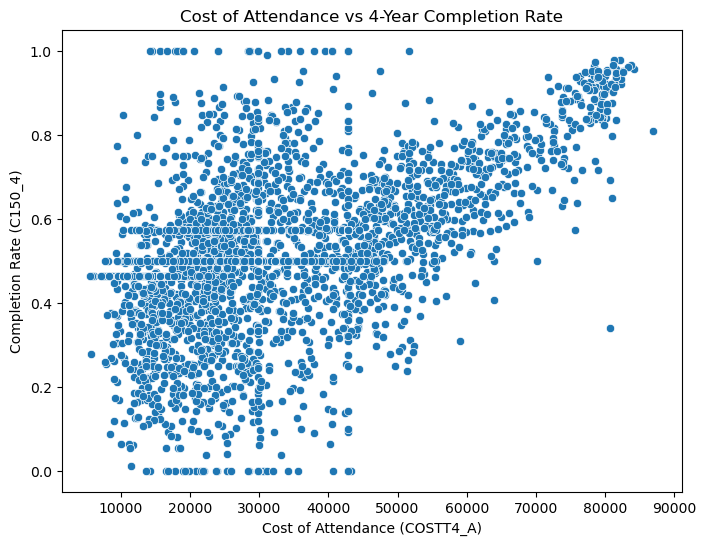

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='COSTT4_A', y='C150_4', data=df_relevant)
plt.title("Cost of Attendance vs 4-Year Completion Rate")
plt.xlabel("Cost of Attendance (COSTT4_A)")
plt.ylabel("Completion Rate (C150_4)")
plt.show()


## 7.2 - Feature Engineering

Based on our analysis, we create new features to capture important differences such as cost burden and socioeconomic disparities. These engineered features may improve our models and reveal new insights.


In [ ]:
# Tuition Gap: Difference between out-of-state and in-state tuition
df_relevant['TUITION_GAP'] = df_relevant['TUITIONFEE_OUT'] - df_relevant['TUITIONFEE_IN']

# Pell Grant Difference: To compare direct school submissions vs derived stats
df_relevant['PELL_GAP'] = df_relevant['PCTPELL_DCS'] - df_relevant['PCTPELL']

# Display the new columns
df_relevant[['TUITIONFEE_IN', 'TUITIONFEE_OUT', 'TUITION_GAP', 'PCTPELL', 'PCTPELL_DCS', 'PELL_GAP']].head()


/var/folders/dn/6ddty5pj0t383r9xmwfs26s40000gn/T/ipykernel_63508/372210313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['TUITION_GAP'] = df_relevant['TUITIONFEE_OUT'] - df_relevant['TUITIONFEE_IN']
/var/folders/dn/6ddty5pj0t383r9xmwfs26s40000gn/T/ipykernel_63508/372210313.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['PELL_GAP'] = df_relevant['PCTPELL_DCS'] - df_relevant['PCTPELL']


,TUITIONFEE_IN,TUITIONFEE_OUT,TUITION_GAP,PCTPELL,PCTPELL_DCS,PELL_GAP
0,10024.00,18634.00,8610.00,0.65,0.66,0.00
1,8832.00,21216.00,12384.00,0.33,0.34,0.01
2,27140.00,27208.00,68.00,0.78,0.78,0.00
3,11878.00,24770.00,12892.00,0.22,0.22,0.01
4,11068.00,19396.00,8328.00,0.70,0.70,0.00


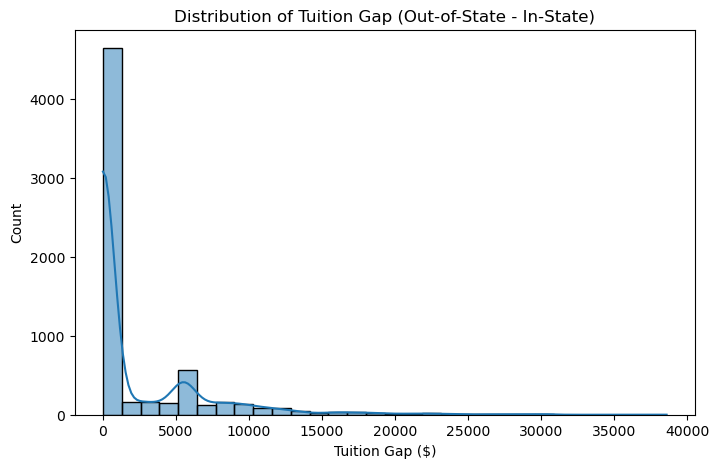

In [ ]:
# Visualize the Tuition Gap
plt.figure(figsize=(8, 5))
sns.histplot(df_relevant['TUITION_GAP'], kde=True, bins=30)
plt.title("Distribution of Tuition Gap (Out-of-State - In-State)")
plt.xlabel("Tuition Gap ($)")
plt.show()


## Step 8 Defining the Target Variable

To prepare for modeling, we define a target variable that reflects college admission success. 
Since we don’t have explicit admission data, we’ll use one of the following proxies:

- **Binary Classification:** Predict if a school has a high SAT average (`SAT_AVG >= 1150`)
- **Graduation Success Tiers:** Categorize schools based on `C150_4` graduation rate


In [ ]:
# Binary Target Based on SAT Score
# Create a binary target column: 1 if SAT >= 1150, else 0
df_relevant['ADMITTED'] = (df_relevant['SAT_AVG'] >= 1150).astype(int)

# Check balance of the new class
df_relevant['ADMITTED'].value_counts()


/var/folders/dn/6ddty5pj0t383r9xmwfs26s40000gn/T/ipykernel_63508/4035129414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['ADMITTED'] = (df_relevant['SAT_AVG'] >= 1150).astype(int)


ADMITTED
0    4641
1    1843
Name: count, dtype: int64

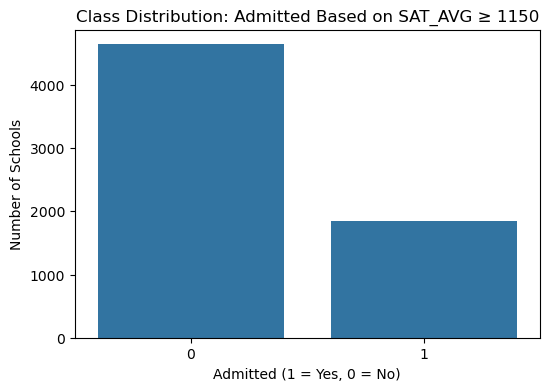

In [ ]:
# Class balance plot
plt.figure(figsize=(6, 4))
sns.countplot(x='ADMITTED', data=df_relevant)
plt.title("Class Distribution: Admitted Based on SAT_AVG ≥ 1150")
plt.xlabel("Admitted (1 = Yes, 0 = No)")
plt.ylabel("Number of Schools")
plt.show()


To support multiple angles of analysis, we define **two target variables**:
- `ADMITTED`: A binary classification label based on whether the school's average SAT score is ≥ 1150.
- `GRAD_TIER`: A categorical variable splitting schools into graduation success tiers based on the 4-year graduation rate (`C150_4`).

In [ ]:
# A. Binary Admission Target
df_relevant['ADMITTED'] = (df_relevant['SAT_AVG'] >= 1150).astype(int)

# B. Graduation Tier (High, Medium, Low)
def grad_tier(rate):
    if rate >= 0.75:
        return 'High'
    elif rate >= 0.5:
        return 'Medium'
    else:
        return 'Low'

df_relevant['GRAD_TIER'] = df_relevant['C150_4'].apply(grad_tier)

# Preview target columns
print(df_relevant[['SAT_AVG', 'ADMITTED', 'C150_4', 'GRAD_TIER']].head())


   SAT_AVG  ADMITTED  C150_4 GRAD_TIER
0   920.00         0    0.27       Low
1  1291.00         1    0.64    Medium
2  1178.00         1    0.50    Medium
3  1259.00         1    0.63    Medium
4   963.00         0    0.28       Low


/var/folders/dn/6ddty5pj0t383r9xmwfs26s40000gn/T/ipykernel_63508/200226391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['ADMITTED'] = (df_relevant['SAT_AVG'] >= 1150).astype(int)
/var/folders/dn/6ddty5pj0t383r9xmwfs26s40000gn/T/ipykernel_63508/200226391.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['GRAD_TIER'] = df_relevant['C150_4'].apply(grad_tier)


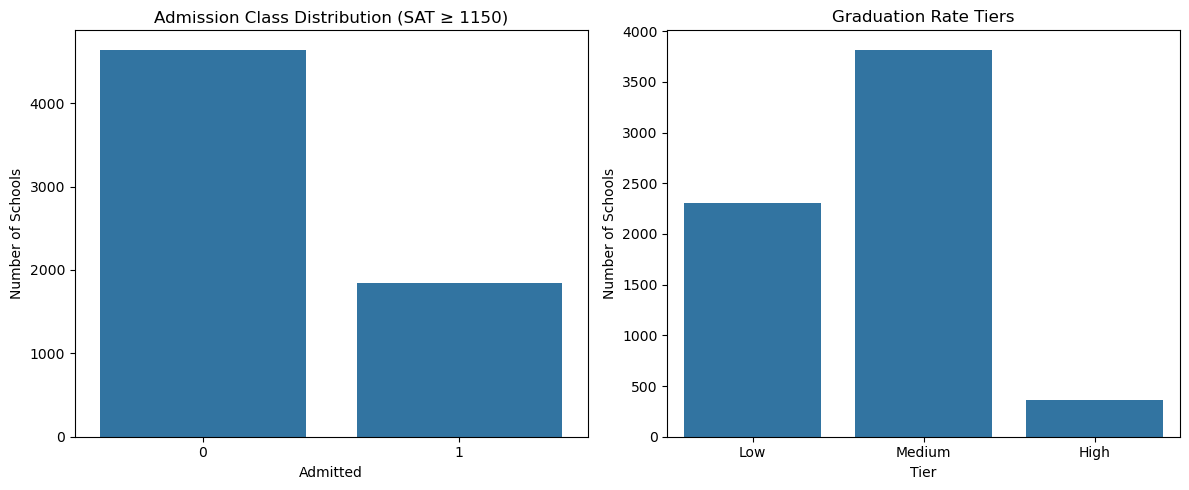

In [ ]:
# Plot distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='ADMITTED', data=df_relevant, ax=ax[0])
ax[0].set_title("Admission Class Distribution (SAT ≥ 1150)")
ax[0].set_xlabel("Admitted")
ax[0].set_ylabel("Number of Schools")

sns.countplot(x='GRAD_TIER', data=df_relevant, order=['Low', 'Medium', 'High'], ax=ax[1])
ax[1].set_title("Graduation Rate Tiers")
ax[1].set_xlabel("Tier")
ax[1].set_ylabel("Number of Schools")

plt.tight_layout()
plt.show()


### Summary: Creating Target Variables

To support both binary and multi-class classification tasks, we created two target variables. The first, `ADMITTED`, labels schools as 1 if their average SAT score is 1150 or higher and 0 otherwise, representing a proxy for admission competitiveness. The second, `GRAD_TIER`, categorizes schools into 'Low', 'Medium', or 'High' graduation rate tiers based on their 4-year graduation rate (`C150_4`). We also visualized the distribution of both targets to assess class balance before modeling.


### Step 9: Importing Necessary Libraries for Feature Selection
We import `LogisticRegression` for modeling, `RFE` (Recursive Feature Elimination) for feature selection, and `StandardScaler` for standardizing our dataset before modeling.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler


### Step 9.1: Verifying Imputation Success
We recheck the columns that were imputed earlier to ensure no missing values remain before moving forward with encoding and scaling.


In [ ]:
# Check if any imputed columns still have missing values
impute_columns = [
    'SAT_AVG', 'ADM_RATE_ALL', 'COSTT4_A',
    'TUITIONFEE_IN', 'TUITIONFEE_OUT',
    'AVGFACSAL', 'MD_EARN_WNE_INC1_P10',
    'MD_EARN_WNE_INC2_P10', 'MD_EARN_WNE_INC3_P10',
]

# Check missing values in the imputed columns
missing_values = df_relevant[impute_columns].isna().sum()
print(missing_values)


SAT_AVG                 0
ADM_RATE_ALL            0
COSTT4_A                0
TUITIONFEE_IN           0
TUITIONFEE_OUT          0
AVGFACSAL               0
MD_EARN_WNE_INC1_P10    0
MD_EARN_WNE_INC2_P10    0
MD_EARN_WNE_INC3_P10    0
dtype: int64


### Step 10: Define Target and Feature Set
We define our target variable `C150_4` and remove it from the feature matrix `X`. We also drop rows where the target is missing and verify that there are no remaining missing values in our features before encoding.


In [ ]:
# Define the target variable and features
X = df_relevant.dropna(subset=["C150_4"])  # Drop rows where the target variable is missing
y = X["C150_4"]  # Assuming "C150_4" is your target variable
X = X.drop(columns=["C150_4"])  # Drop the target from the features

# Check if there are any missing values in the features (should return all 0's)
print("Missing values in features before encoding:")
print(X.isna().sum())


Missing values in features before encoding:
UNITID                     0
INSTNM                     0
CITY                       0
STABBR                     0
CONTROL                    0
LOCALE                   495
ADM_RATE_ALL               0
ADMCON7                 4498
SAT_AVG                    0
ACTCMMID                   0
OPENADMP                 900
UGDS                     768
UGDS_WHITE               768
UGDS_BLACK               768
UGDS_HISP                768
UGDS_ASIAN               768
UGDS_AIAN                768
UGDS_NHPI                768
UGDS_2MOR                768
UGDS_NRA                 768
UGDS_UNKN                768
UGDS_MEN                 768
UGDS_WOMEN               768
UG25ABV                  949
FIRSTGEN_DEBT_MDN        186
NOTFIRSTGEN_DEBT_MDN     186
PAR_ED_PCT_1STGEN        529
PCTFLOAN                 813
PCTPELL                  813
PCTFLOAN_DCS             805
PCTPELL_DCS              805
FAMINC                   529
MD_FAMINC                529

## Step 11: Handling Remaining Missing Values Before Encoding

Now that we've isolated our features, we handle any remaining missing data:
- **Numeric columns** are filled with their **median**
- **Categorical columns** are filled with their **most frequent value (mode)**


In [ ]:
# Handle missing values before encoding
# First, fill numeric columns with the median
numeric_cols = X.select_dtypes(include=[float, int]).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

# Then fill categorical columns with the mode
categorical_cols = X.select_dtypes(exclude=[float, int]).columns
for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

# Check again to confirm all missing values are handled
print("Missing values after imputation:\n", X.isna().sum())


Missing values after imputation:
 UNITID                  0
INSTNM                  0
CITY                    0
STABBR                  0
CONTROL                 0
LOCALE                  0
ADM_RATE_ALL            0
ADMCON7                 0
SAT_AVG                 0
ACTCMMID                0
OPENADMP                0
UGDS                    0
UGDS_WHITE              0
UGDS_BLACK              0
UGDS_HISP               0
UGDS_ASIAN              0
UGDS_AIAN               0
UGDS_NHPI               0
UGDS_2MOR               0
UGDS_NRA                0
UGDS_UNKN               0
UGDS_MEN                0
UGDS_WOMEN              0
UG25ABV                 0
FIRSTGEN_DEBT_MDN       0
NOTFIRSTGEN_DEBT_MDN    0
PAR_ED_PCT_1STGEN       0
PCTFLOAN                0
PCTPELL                 0
PCTFLOAN_DCS            0
PCTPELL_DCS             0
FAMINC                  0
MD_FAMINC               0
TUITIONFEE_IN           0
TUITIONFEE_OUT          0
COSTT4_A                0
AVGFACSAL               0
DEBT

### Step 12 – Encoding Categorical Features and Standardizing the Dataset

In this step, we:
- Identify non-numeric (categorical) columns.
- Use OneHotEncoder to encode the categorical variables.
- Keep numeric columns as they are using `remainder='passthrough'`.
- Standardize the entire feature set to ensure consistent scaling of numeric values.

This is crucial for ensuring the model performs optimally on the transformed dataset.


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identify non-numeric columns for encoding
non_numeric_cols = X.select_dtypes(exclude=[float, int]).columns
print("Non-Numeric Columns:", non_numeric_cols)

# Create a column transformer to apply OneHotEncoder to categorical columns
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), non_numeric_cols)
    ],
    remainder='passthrough'  # Keep numeric columns as they are
)

# Apply the column transformer to the features
X_processed = column_transformer.fit_transform(X)

# Standardize the processed features (set with_mean=False for sparse matrix)
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_processed)


Non-Numeric Columns: Index(['INSTNM', 'CITY', 'STABBR', 'FIRSTGEN_DEBT_MDN', 'NOTFIRSTGEN_DEBT_MDN',
       'PAR_ED_PCT_1STGEN', 'FAMINC', 'MD_FAMINC', 'DEBT_MDN', 'GRAD_DEBT_MDN',
       'COMPL_RPY_3YR_RT', 'CONTROL_LABEL', 'LOCALE_GROUP', 'GRAD_TIER'],
      dtype='object')


### Step 13 – Check for Missing Values After Processing

In this step, we check if any missing values are present after applying the transformations, including encoding and scaling. Ensuring there are no missing values before model training is critical.


In [ ]:
print("Any missing values after processing?", pd.DataFrame(X_scaled).isna().sum().sum())


Any missing values after processing? 0


### Step 14 – Feature Selection with Recursive Feature Elimination (RFE)

In this step, we apply Recursive Feature Elimination (RFE) to identify the most important features based on the Linear Regression model. We aim to select the top 10 features that contribute the most to predicting the target variable. The RFE method helps to improve the performance of the model by reducing overfitting and focusing on the most relevant features.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import numpy as np

# Ensure X contains only numeric columns for RFE
X_numeric = X.select_dtypes(include=[np.number])

# Step 1: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Step 2: Apply RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_scaled, y)

# Step 3: Get selected features
selected_features = X_numeric.columns[rfe.support_]
print("Selected Top 10 Features by RFE:\n", selected_features.tolist())

# Step 4: Extract rows from the X DataFrame corresponding to the selected features
final_df = X[selected_features.tolist()]

# Step 5: Add the target variable to the final DataFrame
final_df['C150_4'] = y

# Step 6: Save the final DataFrame to a CSV file
final_df.to_csv('test2.csv', index=False)

Selected Top 10 Features by RFE:
 ['ACTCMMID', 'PCTFLOAN', 'PCTFLOAN_DCS', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'COSTT4_A', 'RET_FT4', 'MD_EARN_WNE_INC1_P10', 'MD_EARN_WNE_INC3_P10', 'TUITION_GAP']


/var/folders/dn/6ddty5pj0t383r9xmwfs26s40000gn/T/ipykernel_63508/3210519221.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['C150_4'] = y
